In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data = pd.read_csv('../content/gdrive/My Drive/Credit Card Fraud/creditcard.csv')

## Data Analysis

In [0]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [0]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


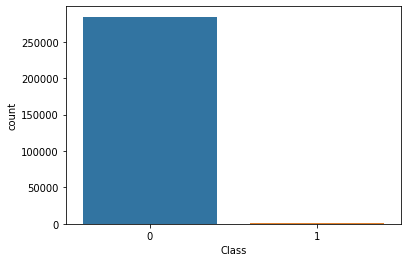

In [0]:
sns.countplot('Class', data=data)

In [0]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
print('Max amount : ',data['Amount'].values.max())
print('Min amount : ',data['Amount'].values.min())

Max amount :  25691.16
Min amount :  0.0


In [0]:
data['Amount'].nunique()

32767

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6bd459dd8>,
      dtype=object)

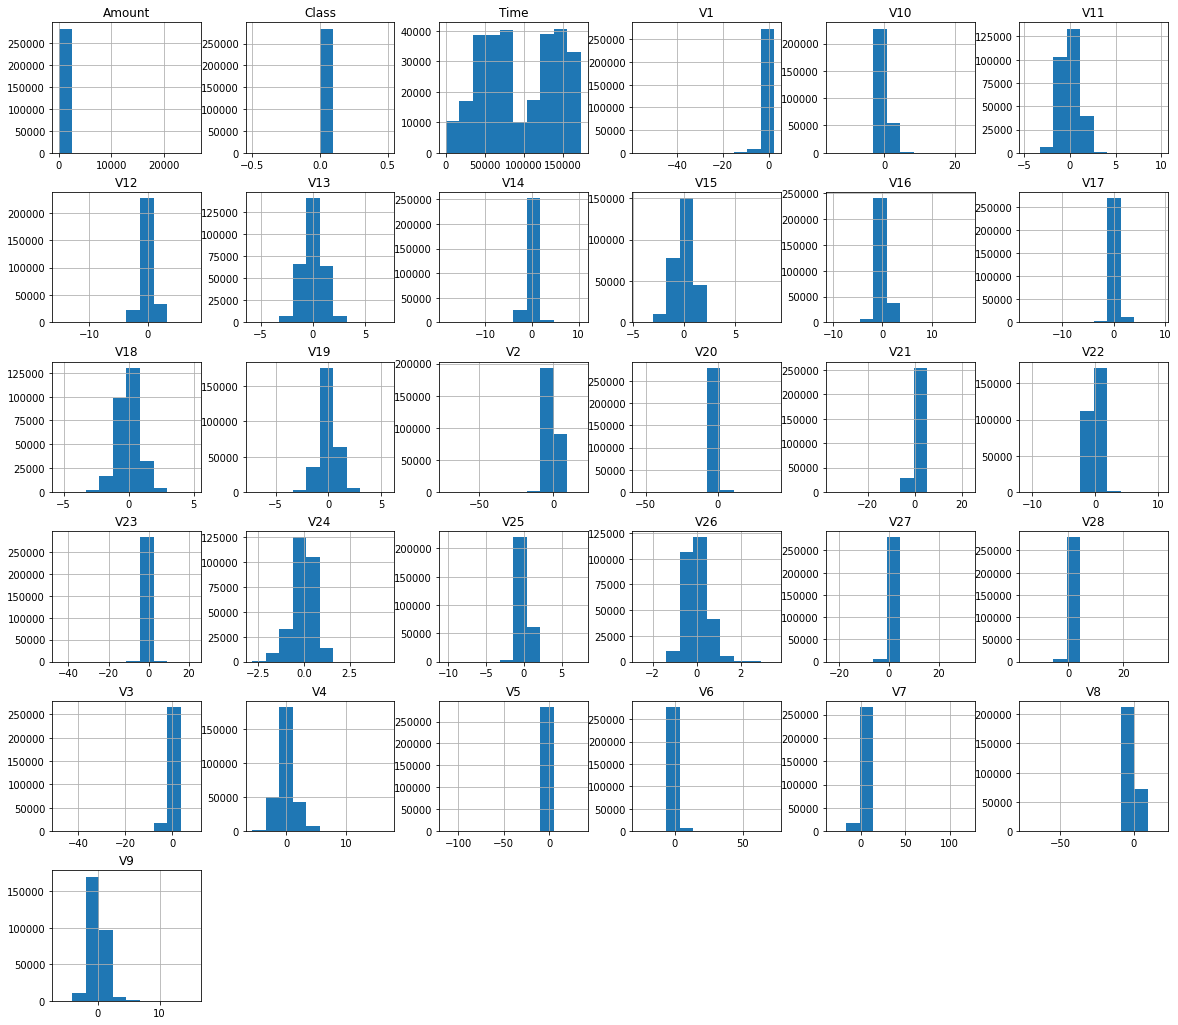

In [0]:
data[data['Class']==0].hist(figsize=(20,18))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6bc22ada0>,
      dtype=object)

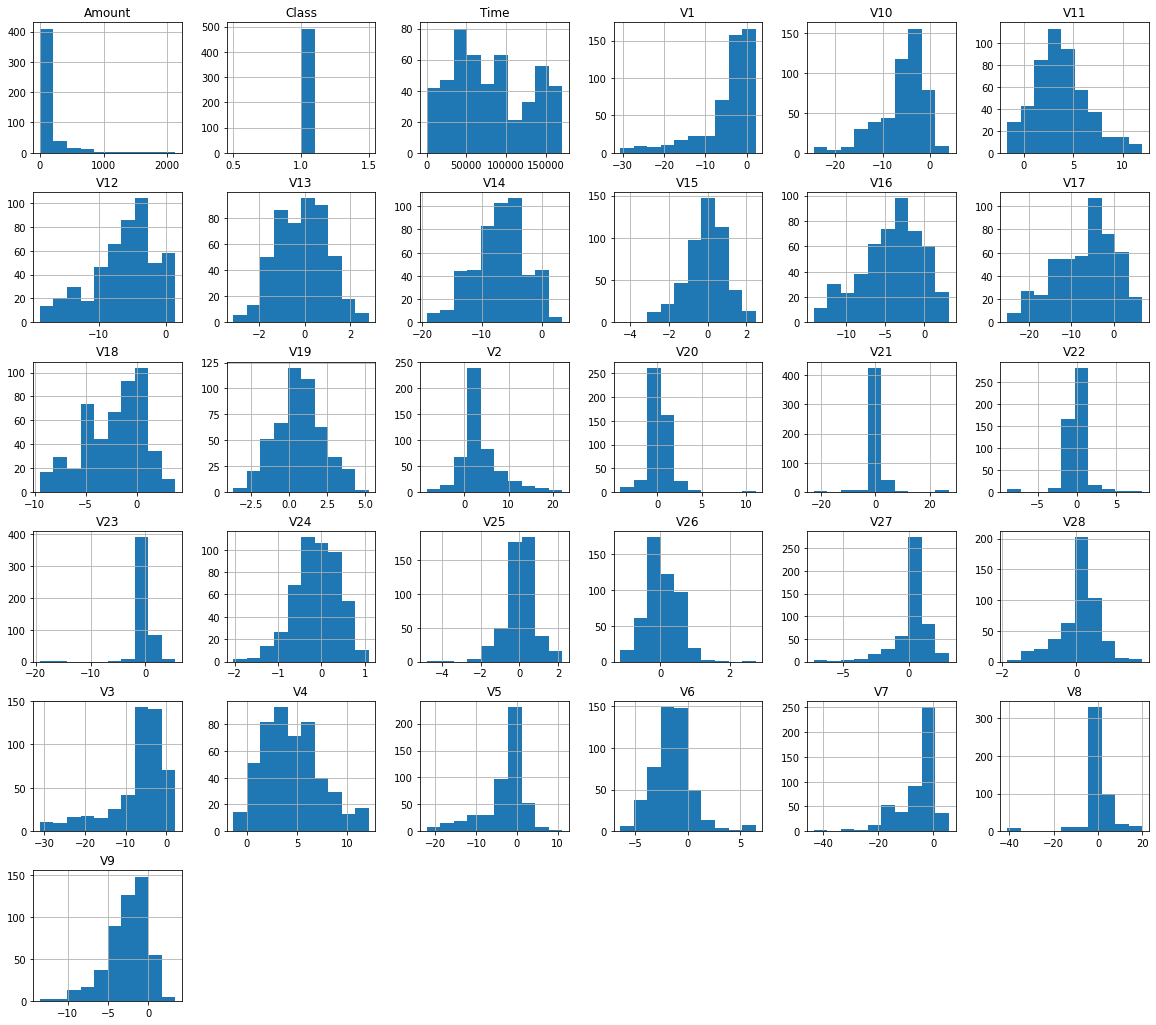

In [0]:
data[data['Class']==1].hist(figsize=(20,18))

## Data Processing

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
data['scaled_time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))

In [0]:
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [0]:
data.drop(['Amount','Time'],axis = 1, inplace = True)

In [0]:
!pip install -U imbalanced-learn


     |████████████████████████████████| 163kB 8.9MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [0]:
import imblearn
print(imblearn.__version__)


Using TensorFlow backend.


0.6.2


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop('Class', axis=1)
y = data['Class']

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2)

## Oversampling

In [0]:
from imblearn.over_sampling import RandomOverSampler

In [0]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [0]:
X_oversample, y_oversample = oversample.fit_resample(X, y)

In [0]:
y_oversample.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [0]:
X_oversample.shape

(568630, 30)

In [0]:
X_over_train_full , X_over_test, y_over_train_full, y_over_test = train_test_split(X_oversample, y_oversample, test_size = 0.2)

In [0]:
X_over_train , X_over_valid, y_over_train, y_over_valid = train_test_split(X_over_train_full, y_over_train_full, test_size = 0.3)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [0]:
log_reg_over = LogisticRegression()
rfc_over = RandomForestClassifier()
xgbc_over = XGBClassifier()

In [0]:
from scipy.stats import uniform
log_hyperparameters = {
    'penalty' : ['l1', 'l2'],
    'C' : uniform
}

In [0]:
rfc_hyperparameters = {'bootstrap': [True, False],
 'n_estimators': [400, 600, 800]}

In [0]:
xgb_params ={
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

### Logistic Regression

In [0]:
# Randomized Search for Logistic Regression
log_over_rs = RandomizedSearchCV(log_reg_over, log_hyperparameters, cv = 5 , n_iter = 10, random_state=42,
                                   scoring = 'f1', n_jobs = -1 )

In [0]:
best_log_over = log_over_rs.fit(X_over_train_full, y_over_train_full)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
best_log_over.best_score_

0.9489142624079255

In [0]:
best_log_over.best_params_

{'C': 0.7080725777960455, 'penalty': 'l2'}

In [0]:
final_log_over = LogisticRegression(penalty='l2', C = 0.7080725777960455 )

In [0]:
final_log_over.fit(X_over_train_full, y_over_train_full)

LogisticRegression(C=0.7080725777960455, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
ypred_log_over = final_log_over.predict(X_test)

In [0]:
print(classification_report(y_test, ypred_log_over))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56873
           1       0.06      0.94      0.12        89

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [0]:
roc_auc_score(y_over_test, ypred_log_over)

0.9497285557636845

In [0]:
rfc_over_rs = RandomizedSearchCV(rfc_over, rfc_hyperparameters, n_iter = 10, cv = 5, 
                                 scoring = 'f1', n_jobs = -1)

In [0]:
#best_rfc_over = rfc_over_rs.fit(X_over_train_full, y_over_train_full)

In [0]:
xgb_over_rs = RandomizedSearchCV(xgbc_over, xgb_params, n_iter= 10, cv = 5,
                                 scoring = 'f1', n_jobs = -1)

#best_xgb_over = xgb_over_rs.fit(X_over_train_full, y_over_train_full)

In [0]:
#best_rfc_over.best_params_

In [0]:
rfc_over = RandomForestClassifier( n_jobs = -1)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [0]:
cv = StratifiedKFold(n_splits = 5 , shuffle = True, random_state = 42)

In [0]:
rfc_over.fit(X_over_train_full, y_over_train_full)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
ypred_rfc_over = rfc_over.predict(X_test)

In [0]:
print(classification_report(y_test, ypred_rfc_over))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56845
           1       0.99      1.00      1.00       117

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



In [0]:
roc_auc_score(y_test, ypred_rfc_over)

0.9999912041516404

In [0]:
xgbc_over.fit(X_over_train_full, y_over_train_full)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
ypred_xgbc_over = xgbc_over.predict(X_test)

In [0]:
print(classification_report(y_test, ypred_xgbc_over))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56845
           1       0.23      1.00      0.37       117

    accuracy                           0.99     56962
   macro avg       0.61      1.00      0.68     56962
weighted avg       1.00      0.99      1.00     56962



## Undersampling

In [0]:
from imblearn.under_sampling import RandomUnderSampler

In [0]:
undersampler = RandomUnderSampler(sampling_strategy='majority')

In [0]:
X_undersample, y_undersample = undersampler.fit_resample(X_train, y_train)

In [0]:
y_undersample.value_counts()

1    375
0    375
Name: Class, dtype: int64

In [0]:
log_reg_under = LogisticRegression()
rfc_under = RandomForestClassifier()
xgbc_under = XGBClassifier()

In [0]:
log_under_rs = RandomizedSearchCV(log_reg_under, log_hyperparameters, cv = 5 , n_iter = 10, random_state=42,
                                   scoring = 'f1', n_jobs = -1 )

In [0]:
best_log_under = log_under_rs.fit(X_undersample, y_undersample)

In [0]:
best_log_under.best_params_

{'C': 0.05808361216819946, 'penalty': 'l2'}

In [0]:
log_reg_under = LogisticRegression(penalty = 'l2', C = 0.05808361216819946)

In [0]:
log_reg_under.fit(X_undersample, y_undersample)

LogisticRegression(C=0.05808361216819946, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
ypred_log_under = log_reg_under.predict(X_test)

In [0]:
print(classification_report(y_test,ypred_log_under))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56845
           1       0.07      0.91      0.12       117

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.98     56962



In [0]:
rfc_under_rs = RandomizedSearchCV(rfc_under, rfc_hyperparameters, n_iter = 10, cv = 5, 
                                 scoring = 'f1', n_jobs = -1)

In [0]:
best_rfc_under =rfc_under_rs.fit(X_undersample, y_undersample)

In [0]:
best_rfc_under.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [0]:
rfc_under = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, min_samples_split=2,
                                   bootstrap = False)

In [0]:
rfc_under.fit(X_undersample, y_undersample)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
ypred_rfc_under = rfc_under.predict(X_test)

In [0]:
print(classification_report(y_test, ypred_rfc_under))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56845
           1       0.06      0.91      0.11       117

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.98     56962



In [0]:
roc_auc_score(y_test, ypred_rfc_under)

0.9420833229963319

In [0]:
xgbc_under = XGBClassifier()

In [0]:
xgb_under_rs = RandomizedSearchCV(xgbc_under, xgb_params, n_iter= 10, cv = 5,
                                 scoring = 'f1', n_jobs = -1)

best_xgb_under = xgb_under_rs.fit(X_undersample, y_undersample)

In [0]:
best_xgb_under.best_params_

{'colsample_bytree': 0.8,
 'gamma': 1,
 'max_depth': 3,
 'min_child_weight': 10,
 'subsample': 1.0}

In [0]:
xgbc_under = XGBClassifier(colsample_bytree=0.8, gamma=1, max_depth=3,
                           min_child_weight = 10,
                           subsample = 1.0)

In [0]:
xgbc_under.fit(X_undersample, y_undersample)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

In [0]:
ypred_xgbc_under = xgbc_under.predict(X_test)

In [0]:
print(classification_report(y_test, ypred_xgbc_under))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56873
           1       0.04      0.94      0.08        89

    accuracy                           0.97     56962
   macro avg       0.52      0.96      0.53     56962
weighted avg       1.00      0.97      0.98     56962



In [0]:
roc_auc_score(y_test, ypred_xgbc_under)

0.9553996416616799

## SMOTE

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
smote_sampler = SMOTE(random_state=42)

In [0]:
X_smote , y_smote = smote_sampler.fit_resample(X,y)

In [0]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
y_smote.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [0]:
log_smote = LogisticRegression()
rfc_smote = RandomForestClassifier()
xgbc_smote = XGBClassifier()

In [0]:
log_smote_rs = RandomizedSearchCV(log_smote, log_hyperparameters, cv = 5 , n_iter = 10, random_state=42,
                                   scoring = 'f1', n_jobs = -1 )

In [0]:
best_log_smote = log_smote_rs.fit(X_smote, y_smote)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
best_log_smote.best_params_

{'C': 0.0007787658410143283, 'penalty': 'l2'}

In [0]:
log_smote = LogisticRegression(penalty = 'l2',
                               C = 0.0007787658410143283)

In [0]:
log_smote.fit(X_smote, y_smote)

LogisticRegression(C=0.0007787658410143283, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
ypred_log_smote = log_smote.predict(X_test)

In [0]:
print(classification_report(y_test, ypred_log_smote ))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56873
           1       0.06      0.94      0.12        89

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [0]:
roc_auc_score(y_test, ypred_log_smote)

0.9608767573404731

In [0]:
rfc_smote_rs = RandomizedSearchCV(rfc_smote, rfc_hyperparameters, n_iter = 10, cv = 5, 
                                 scoring = 'f1', n_jobs = -1)

In [0]:
best_rfc_smote = rfc_smote_rs.fit(X_smote, y_smote)

In [0]:
rfc_smote = RandomForestClassifier(n_estimators= 300, max_features='auto')

In [0]:
rfc_smote.fit(X_smote, y_smote)

In [0]:
ypred = rfc_smote.predict(X_test)

In [0]:
xgbc_smote = XGBClassifier(n_estimators= 750,  max_depth=10, learning_rate= 0.1,gamma =0.1)

In [0]:
xgbc_smote.fit(X_smote,y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=750, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
ypred_xgbc_smote = xgbc_smote.predict(X_test)

In [0]:
print(classification_report(y_test, ypred_xgbc_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       1.00      1.00      1.00        89

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



In [0]:
from sklearn.metrics import f1_score

In [0]:
confusion_matrix(y_test, ypred_xgbc_smote)

array([[56873,     0],
       [    0,    89]])

## No Sampling

In [0]:
log_reg_normal = LogisticRegression(C=0.1,
                                    penalty='l2')

In [0]:
log_reg_normal.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_log_normal = log_reg_normal.predict(X_test)

In [0]:
print(classification_report(y_test, y_pred_log_normal))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.85      0.70      0.77        89

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [0]:
rfc_normal = RandomForestClassifier(n_estimators= 400, n_jobs = -1)

In [0]:
rfc_normal.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
ypred_rfc_normal = rfc_normal.predict(X_test)

In [0]:
print(classification_report(y_test, ypred_rfc_normal))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.96      0.80      0.87        89

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [0]:
from sklearn.metrics import plot_confusion_matrix

In [0]:
rfc_normal_cm = confusion_matrix(y_test, ypred_rfc_normal)

In [0]:
xgbc_normal = XGBClassifier(n_estimators= 880,  max_depth=10, learning_rate= 0.1,gamma =0.1)

In [0]:
xgbc_normal.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=880, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
ypred_xgbc_normal = xgbc_normal.predict(X_test)

In [0]:
print(classification_report(y_test, ypred_xgbc_normal))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.94      0.81      0.87        89

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

